# Neural Network with Estimator Project

Dataset: [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer): indicates whether or not a Bank Note was authentic

In [100]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [101]:
notes = pd.read_csv('./filez/bank_note_data.csv')
notes.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Exploratory Data Analysis

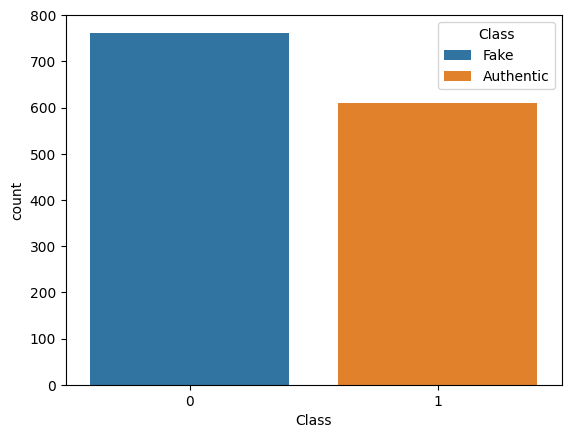

In [102]:
# show count of `Class` (Fake 0 vs. Authentic 1)
ax = sns.countplot(data=notes, x="Class", hue="Class")
ax.legend(title="Class", labels=["Fake", "Authentic"])

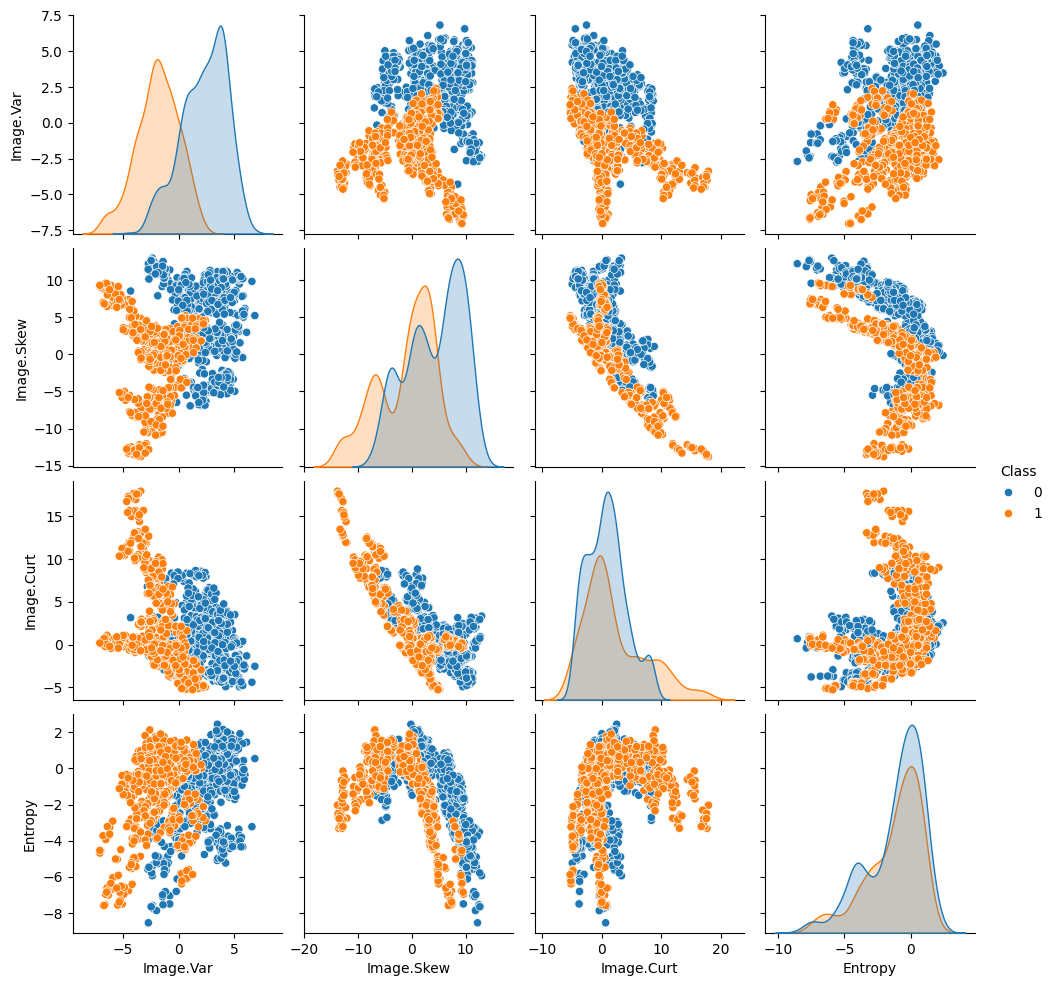

In [103]:
# show pairplot with `Class` as hue
sns.pairplot(data=notes, hue='Class')

    Data looks quite separable, so models should work well.

## Standardize Data
Not strictly necessary for this project but still a good practise, especially when using algorithms that are sensitive to the scale of the data, such as support vector machines (SVMs) or neural networks.

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = notes.drop("Class", axis=1)

In [105]:
# fit scaler to the features (computes the mean and
# standard deviation for each feature in the dataset)
scaler.fit(features)
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [106]:
# transform features to a df with scaled values
scaled_features = scaler.transform(features)
notes_scaled = pd.DataFrame(scaled_features, columns=features.columns)
notes_scaled.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train/Test Split

In [107]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = notes_scaled
y = notes["Class"]
yc = to_categorical(y, num_classes=4)

X_train, X_test, y_train, y_test = train_test_split(
    X, yc, test_size=0.3, random_state=101
)

## TensorFlow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=4, activation="relu"))  # First hidden layer
model.add(Dense(20, activation="relu"))  # Second hidden layer
model.add(Dense(10, activation="relu"))  # Third hidden layer
model.add(Dense(4, activation="softmax"))  # Output layer

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
 1/96 [..............................] - ETA: 21s - loss: 1.1731 - accuracy: 0.4000

96/96 [==============================] - 0s 645us/step - loss: 0.8556 - accuracy: 0.8104
Epoch 2/50
96/96 [==============================] - 0s 851us/step - loss: 0.3042 - accuracy: 0.9417
Epoch 3/50
96/96 [==============================] - 0s 606us/step - loss: 0.0992 - accuracy: 0.9760
Epoch 4/50
96/96 [==============================] - 0s 519us/step - loss: 0.0520 - accuracy: 0.9802
Epoch 5/50
96/96 [==============================] - 0s 500us/step - loss: 0.0355 - accuracy: 0.9875
Epoch 6/50
96/96 [==============================] - 0s 486us/step - loss: 0.0257 - accuracy: 0.9948
Epoch 7/50
96/96 [==============================] - 0s 492us/step - loss: 0.0191 - accuracy: 1.0000
Epoch 8/50
96/96 [==============================] - 0s 460us/step - loss: 0.0142 - accuracy: 0.9990
Epoch 9/50
96/96 [==============================] - 0s 485us/step - loss: 0.0107 - accuracy: 1.0000
Epoch 10/50
96/96 [==============================] - 0s 482us/step - loss: 0.0085 - accuracy: 1.0000
Epoch 11/5

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

13/13 [==============================] - 0s 463us/step
[[238   0]
 [  0 174]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [111]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[234   4]
 [  0 174]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



    Both models give quite precise results 😌